<h1>Business Case: Yulu - Hypothesis Testing</h1>

In [1]:
# Importing necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import scipy.stats as stat

In [2]:
# Importing Aerofit Customer Dataset

data = pd.read_csv(r"C:\Users\Aakash\Desktop\Scalar notes\Assignments\yulu Case Study\bike_sharing.txt")

In [3]:
# Creating a column to get dates

data['date'] = pd.to_datetime(data['datetime']).dt.date

In [4]:
#taking an overall look into the data , it's structure and column names/types

data.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011-01-01
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,2011-01-01
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,2011-01-01
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,2011-01-01
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,2011-01-01


In [5]:
# Checking the data types of each column and explore the presence of null values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  date        10886 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.1+ MB


In [6]:
# satistical summary of numeric data

num_cols = ['humidity', 'windspeed','temp','atemp','windspeed','casual','registered']
catg_cols = ['season','holiday','workingday','weather']

data[num_cols].describe()

,humidity,windspeed,temp,atemp,windspeed,casual,registered
count,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000
mean,61.886460,12.799395,20.23086,23.655084,12.799395,36.021955,155.552177
std,19.245033,8.164537,7.79159,8.474601,8.164537,49.960477,151.039033
min,0.000000,0.000000,0.82000,0.760000,0.000000,0.000000,0.000000
25%,47.000000,7.001500,13.94000,16.665000,7.001500,4.000000,36.000000
50%,62.000000,12.998000,20.50000,24.240000,12.998000,17.000000,118.000000
75%,77.000000,16.997900,26.24000,31.060000,16.997900,49.000000,222.000000
max,100.000000,56.996900,41.00000,45.455000,56.996900,367.000000,886.000000


<h5>Summary:</h5>

The dataset contains hourly bike rental data with 10,886 entries and 12 columns, including weather conditions, temperature, humidity, windspeed, and rental counts. It tracks both casual and registered bike rentals across different seasons, holidays, and working days. Key statistics show varying weather conditions, with average humidity around 61.9%, wind speeds of 12.8 km/h, and a significant range in bike rentals, highlighting patterns in user behavior and environmental influences on bike usage.

<h3>Continious variables</h3>

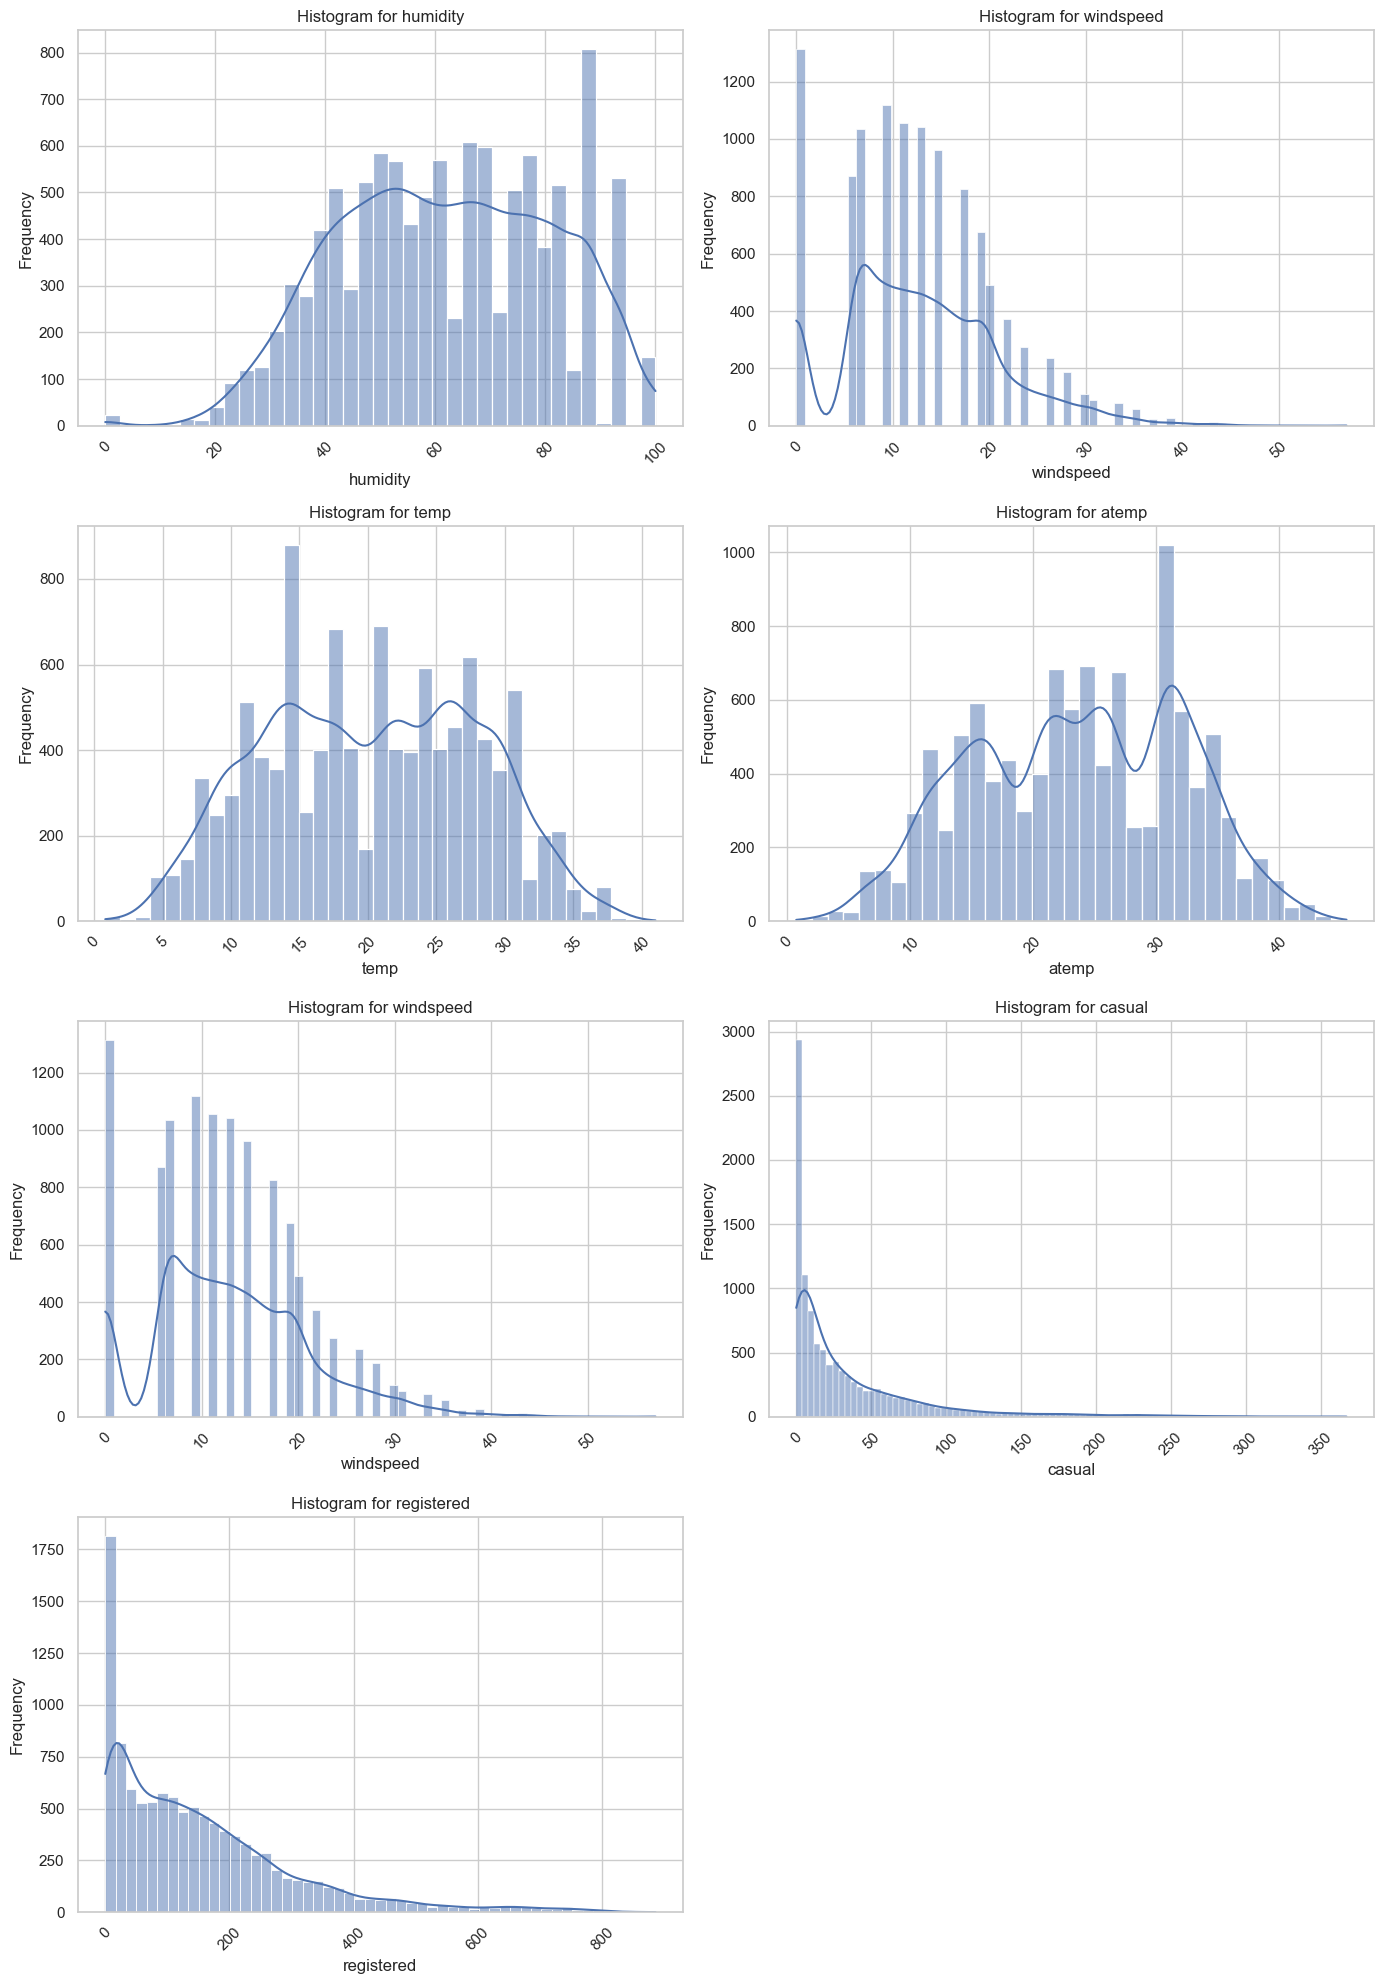

In [7]:
# Set seaborn style
sns.set(style="whitegrid")

# Adjust figure size
plt.figure(figsize=(14, 20))

# Create subplots for each variable in num_cols
for i, var in enumerate(num_cols):
    plt.subplot(4, 2, i + 1)  # Create a 2x4 grid for 8 plots
    sns.histplot(data[var], kde=True)  # KDE for smoother distribution
    plt.title(f'Histogram for {var}')
    plt.xlabel(f'{var}')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)

plt.tight_layout()  # Adjust spacing between plots
plt.show()


Here is the summary for each numerical variable in the table:

1) **Humidity**: The data shows a nearly uniform distribution with peaks around 50–60. Humidity values are widely spread, ranging from 0 to 100.

2) **Windspeed**: The distribution is heavily right-skewed, with most wind speeds concentrated below 20. Very few observations exceed 30.

3) **Temperature (temp)**: The temperature data follows a slightly bimodal distribution, with most values ranging between 10 and 30, indicating moderate temperatures.

4) **Feels-like Temperature (atemp)**: The distribution resembles temperature but has a sharper peak around 20–30, suggesting closer clustering of values in that range.

5) **Casual Users (casual)**: The data is strongly right-skewed, with the majority of values below 50, indicating a smaller casual user base.

6) **Registered Users (registered)**: Registered user counts exhibit a right-skewed distribution, with a gradual decline and most values below 200.

<h3>Categotical variables</h3>

In [8]:
#Finding out unique values for all categorical variables

unique_values = {col: data[col].unique() for col in catg_cols}

for col, values in unique_values.items():
    print(f"Unique values in '{col}': {values}")

Unique values in 'season': [1 2 3 4]
Unique values in 'holiday': [0 1]
Unique values in 'workingday': [0 1]
Unique values in 'weather': [1 2 3 4]


In [9]:
#Finding out value counts for all categorical variables

value_counts = {col: data[col].value_counts() for col in catg_cols}

for col, counts in value_counts.items():
    print(f"Value counts for '{col}':\n{counts}\n")

Value counts for 'season':
season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

Value counts for 'holiday':
holiday
0    10575
1      311
Name: count, dtype: int64

Value counts for 'workingday':
workingday
1    7412
0    3474
Name: count, dtype: int64

Value counts for 'weather':
weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64



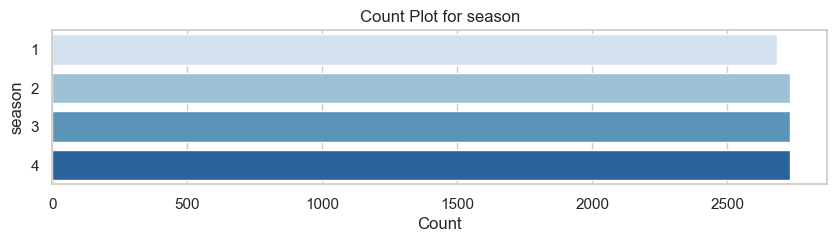

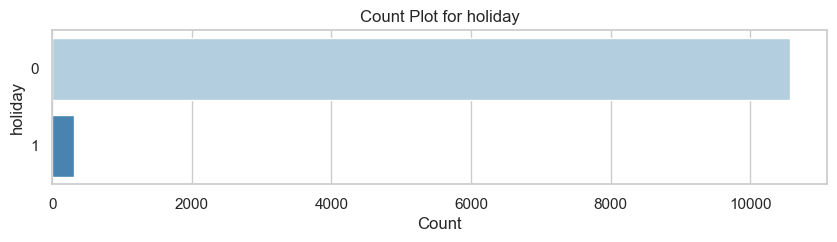

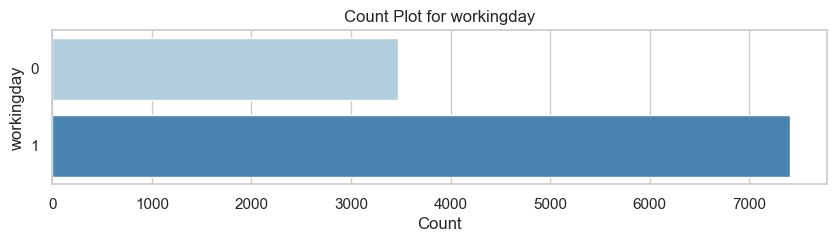

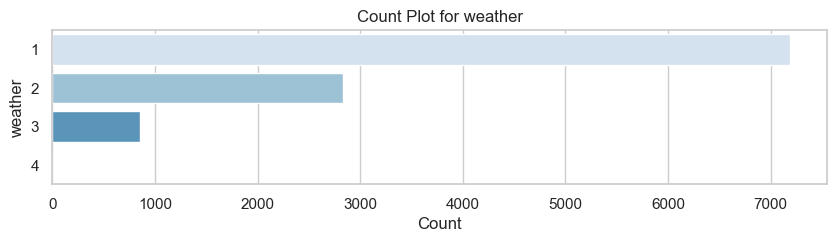

In [10]:
# Visualizing the value counts for all categorical variables

for col in catg_cols:
    plt.figure(figsize=(10, 2))  # Set the figure size
    blue_palette = sns.color_palette("Blues", n_colors=data[col].nunique())
    sns.countplot(y=col, data=data, palette=blue_palette)  # Use 'y' for horizontal count plots
    plt.title(f'Count Plot for {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

**Here’s a concise summary of the categorical data:**

**Season**: 
- The dataset is evenly distributed across seasons, with slightly more records for winter (4) (2734) and slightly fewer for spring (1) (2686).

**Holiday**:
- Non-holidays (0) dominate the dataset, comprising 97.1% of records (10575), while only 2.9% (311) correspond to holidays.

**Working Day**:
- The majority of the days are working days (1), making up 68.1% of the dataset (7412), while non-working days (0) represent 31.9% (3474).

**Weather**:
- The most common weather condition is Clear or Partly Cloudy (1), accounting for 68.1% of the data (7192).
- Mist-related weather (2) follows at 26.8% (2834), while Light Snow or Rain (3) is rare at 8.1% (859).
- Extreme weather conditions (4) are exceptionally rare, with just one recorded instance.

<h3>Bivariate Analysis</h3>

In [11]:
#creating a daily level dataset for variables:season, workingday and holiday

data_daily = pd.DataFrame(data.groupby(['date','season','workingday','holiday'])['count'].sum().reset_index())
data_daily

,date,season,workingday,holiday,count
0,2011-01-01,1,0,0,985
1,2011-01-02,1,0,0,801
2,2011-01-03,1,1,0,1349
3,2011-01-04,1,1,0,1562
4,2011-01-05,1,1,0,1600
...,...,...,...,...,...
451,2012-12-15,4,0,0,5047
452,2012-12-16,4,0,0,3786
453,2012-12-17,4,1,0,4585
454,2012-12-18,4,1,0,5557


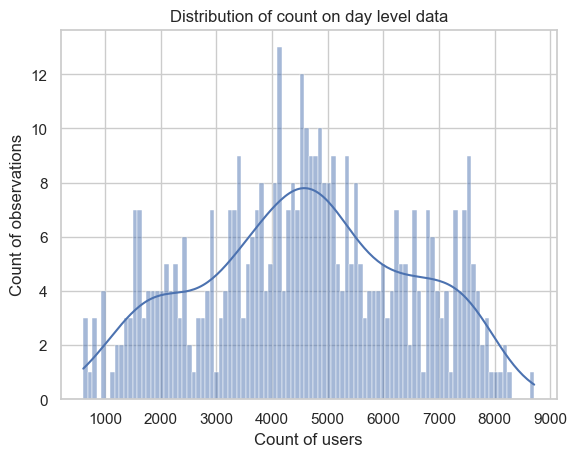

In [12]:
sns.histplot(data=data_daily,x='count',bins=100,kde=True)
plt.title('Distribution of count on day level data')
plt.ylabel('Count of observations')
plt.xlabel('Count of users')
plt.show()

As the data appears to follow a normal distribution, parametric tests such as t-tests and ANOVA can be used to analyze the differences between groups or the effects of independent variables.

**Working Day**

In [13]:
data_daily['workingday'].value_counts()

workingday
1    311
0    145
Name: count, dtype: int64

In [14]:
mean_counts = data_daily.groupby('workingday')['count'].mean()

# Display the result
print(mean_counts)

workingday
0    4516.358621
1    4600.012862
Name: count, dtype: float64


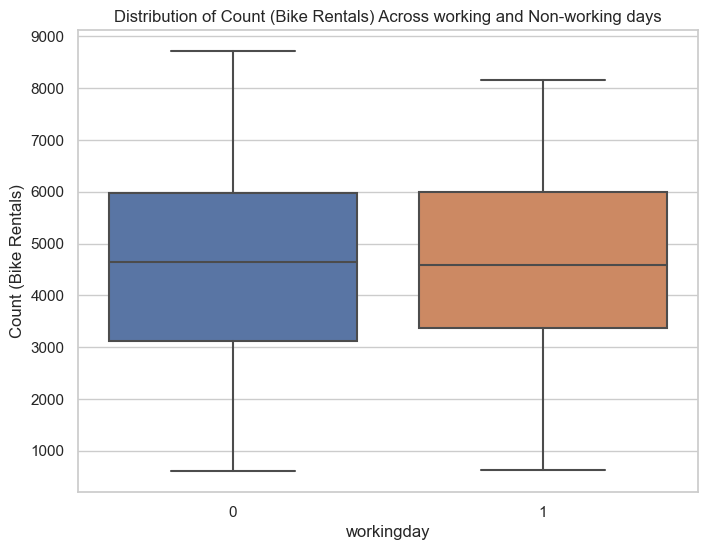

In [15]:
sns.set(style="whitegrid")

# Create a boxplot to see how 'count' spreads across the 'workingday' variable
plt.figure(figsize=(8, 6))

# Plotting the boxplot with 'working day' on the x-axis and 'count' on the y-axis
sns.boxplot(x='workingday', y='count', data=data_daily)

# Title and labels
plt.title('Distribution of Count (Bike Rentals) Across working and Non-working days')
plt.xlabel('workingday')
plt.ylabel('Count (Bike Rentals)')

# Show the plot
plt.show()

<h4>Hypothesis :</h4>

**Null Hypothesis (H₀):** The mean count of users on working days is equal to the mean count of users on non-working days. (No significant difference)

**Alternative Hypothesis (H₁):** The mean count of users on working days is greater than on non-working days. (Working days have more rentals)

In [16]:
# Split the data into working days and non-working days
working_day_counts = data_daily[data_daily['workingday'] == 1]['count']
non_working_day_counts = data_daily[data_daily['workingday'] == 0]['count']

# Perform an independent t-test
t_stat, p_value = stat.ttest_ind(working_day_counts, non_working_day_counts, alternative='greater')

# Display the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference. Working days have more rentals.")
else:
    print("Fail to reject the null hypothesis: No significant difference between working and non-working days.")


T-statistic: 0.44477221614881995
P-value: 0.3283481679939295
Fail to reject the null hypothesis: No significant difference between working and non-working days.


**Holiday**

In [17]:
data_daily['holiday'].value_counts()

holiday
0    443
1     13
Name: count, dtype: int64

In [18]:
mean_counts = data_daily.groupby('holiday')['count'].mean()

# Display the result
print(mean_counts)

holiday
0    4577.128668
1    4446.769231
Name: count, dtype: float64


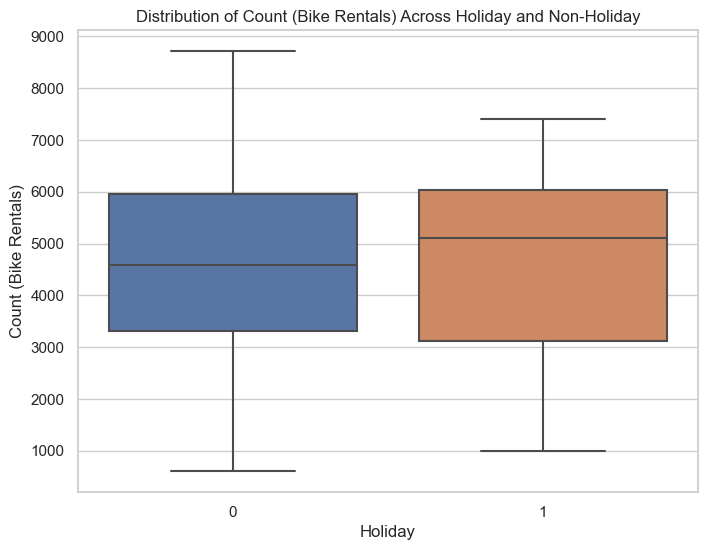

In [19]:
sns.set(style="whitegrid")

# Create a boxplot to see how 'count' spreads across the 'holiday' variable
plt.figure(figsize=(8, 6))

# Plotting the boxplot with 'holiday' on the x-axis and 'count' on the y-axis
sns.boxplot(x='holiday', y='count', data=data_daily)

# Title and labels
plt.title('Distribution of Count (Bike Rentals) Across Holiday and Non-Holiday')
plt.xlabel('Holiday')
plt.ylabel('Count (Bike Rentals)')

# Show the plot
plt.show()

<h4>Hypothesis :</h4>

**Null Hypothesis (H₀):** The mean count of users on holidays is equal to the mean count of users on non-holidays. (No significant difference)

**Alternative Hypothesis (H₁):** The mean count of users on holidays is greater than on non-holidays. (Holidays have less rentals)

In [20]:
# Split the data into holidays and non-holidays
holiday_counts = data_daily[data_daily['holiday'] == 1]['count']
non_holiday_counts = data_daily[data_daily['holiday'] == 0]['count']

# Perform an independent t-test
t_stat, p_value = stat.ttest_ind(holiday_counts, non_holiday_counts, alternative='less')

# Display the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference. Holidays have less rentals.")
else:
    print("Fail to reject the null hypothesis: No significant difference between holidays and non-holidays.")

T-statistic: -0.24764880825448138
P-value: 0.4022590522378083
Fail to reject the null hypothesis: No significant difference between holidays and non-holidays.


**Season**

In [21]:
data_daily['season'].value_counts()

season
1    114
2    114
3    114
4    114
Name: count, dtype: int64

In [22]:
mean_counts = data_daily.groupby('season')['count'].mean()

# Display the result
print(mean_counts)

season
1    2741.210526
2    5160.368421
3    5619.842105
4    4772.228070
Name: count, dtype: float64


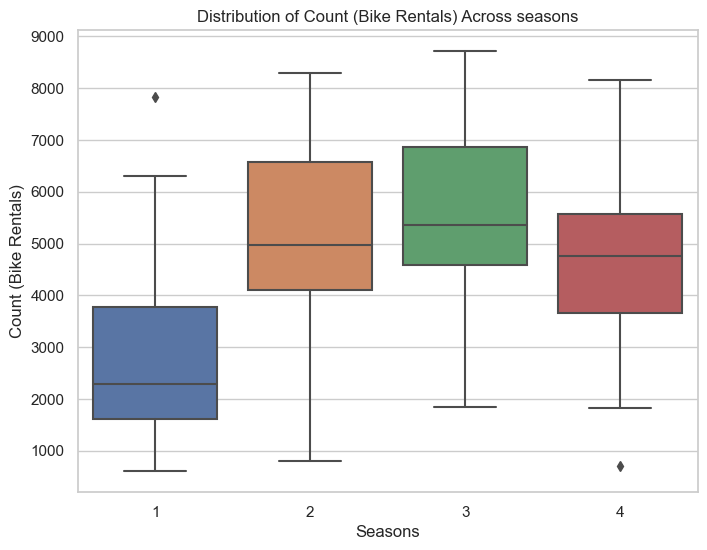

In [23]:
sns.set(style="whitegrid")

# Create a boxplot to see how 'count' spreads across the 'season' variable
plt.figure(figsize=(8, 6))

# Plotting the boxplot with 'season' on the x-axis and 'count' on the y-axis
sns.boxplot(x='season', y='count', data=data_daily)

# Title and labels
plt.title('Distribution of Count (Bike Rentals) Across seasons')
plt.xlabel('Seasons')
plt.ylabel('Count (Bike Rentals)')

# Show the plot
plt.show()

#### Before conducting the ANOVA test, let's first conduct Levene's Test to check for variance equality between the groups (seasons):

#### Hypotheses for Levene's Test:

- **Null Hypothesis (H₀):**  
  There is no significant difference in variance between the different seasons.  
  (The variances are equal across all groups.)

- **Alternative Hypothesis (H₁):**  
  There is a significant difference in variance between at least two of the seasons.  
  (The variances are not equal across the groups.)

In [24]:
# Split the data into four groups based on the 'season' column
season_1_counts = data_daily[data_daily['season'] == 1]['count']
season_2_counts = data_daily[data_daily['season'] == 2]['count']
season_3_counts = data_daily[data_daily['season'] == 3]['count']
season_4_counts = data_daily[data_daily['season'] == 4]['count']

# Perform Levene's test for homogeneity of variances
levene_stat, levene_p_value = stat.levene(season_1_counts, season_2_counts, season_3_counts, season_4_counts)

# Display the Levene's test result
print(f"Levene's test statistic: {levene_stat}")
print(f"P-value from Levene's test: {levene_p_value}")

# Interpret Levene's test result
if levene_p_value > 0.05:
    print("\nLevene's test passed: Variances are equal across the groups. Proceeding with ANOVA.\n")
else:
    print("\nLevene's test failed: Variances are significantly different. Consider using Welch's ANOVA or another method.\n")

Levene's test statistic: 1.5071252673249398
P-value from Levene's test: 0.21194448921499898

Levene's test passed: Variances are equal across the groups. Proceeding with ANOVA.



**Hypothesis for ANOVA:**

**Null Hypothesis (H₀):** The mean count of bike rentals is the same for all seasons (no significant difference between seasons).

**Alternative Hypothesis (H₁):** The mean count of bike rentals is different for at least one of the seasons.

In [25]:
# Perform one-way ANOVA test
f_stat, p_value = stat.f_oneway(season_1_counts, season_2_counts, season_3_counts, season_4_counts)

# Display the results
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in rentals across the seasons.")
else:
    print("Fail to reject the null hypothesis: No significant difference in rentals across the seasons.")

F-statistic: 80.0504789788067
P-value: 1.506580502991204e-41
Reject the null hypothesis: There is a significant difference in rentals across the seasons.


**Weather**

In [26]:
data['weather'].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [27]:
mean_counts = data.groupby('weather')['count'].mean()

# Display the result
print(mean_counts)

weather
1    205.236791
2    178.955540
3    118.846333
4    164.000000
Name: count, dtype: float64


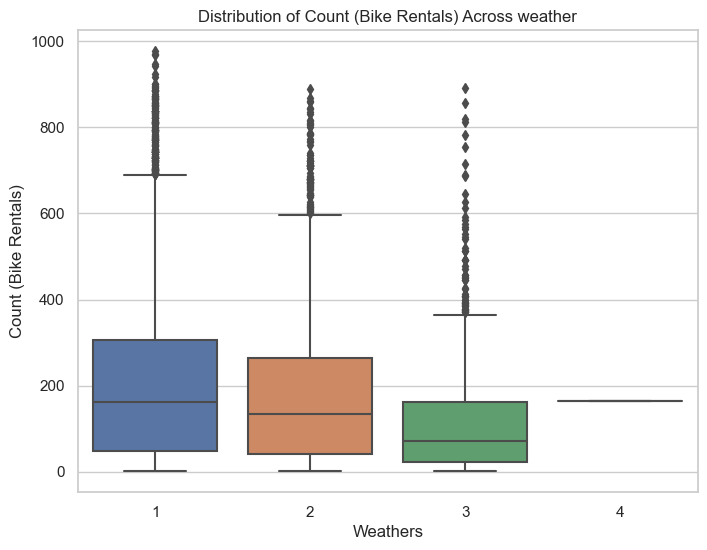

In [28]:
sns.set(style="whitegrid")

# Create a boxplot to see how 'count' spreads across the 'season' variable
plt.figure(figsize=(8, 6))

# Plotting the boxplot with 'weather' on the x-axis and 'count' on the y-axis
sns.boxplot(x='weather', y='count', data=data)

# Title and labels
plt.title('Distribution of Count (Bike Rentals) Across weather')
plt.xlabel('Weathers')
plt.ylabel('Count (Bike Rentals)')

# Show the plot
plt.show()

#### Before conducting the ANOVA test, let's first conduct Levene's Test to check for variance equality between the groups (weathers):

#### Hypotheses for Levene's Test:

- **Null Hypothesis (H₀):**  
  There is no significant difference in variance between the different weathers.  
  (The variances are equal across all groups.)

- **Alternative Hypothesis (H₁):**  
  There is a significant difference in variance between at least two of the weathers.  
  (The variances are not equal across the groups.)

In [29]:
# Split the data into four groups based on the 'weather' column
w_1_counts = data[data['weather'] == 1]['count']
w_2_counts = data[data['weather'] == 2]['count']
w_3_counts = data[data['weather'] == 3]['count']
w_4_counts = data[data['weather'] == 4]['count']

# Perform Levene's test for homogeneity of variances
levene_stat, levene_p_value = stat.levene(w_1_counts, w_2_counts, w_3_counts, w_4_counts)

# Display the Levene's test result
print(f"Levene's test statistic: {levene_stat}")
print(f"P-value from Levene's test: {levene_p_value}")

# Interpret Levene's test result
if levene_p_value > 0.05:
    print("\nLevene's test passed: Variances are equal across the groups. Proceeding with ANOVA.\n")
else:
    print("\nLevene's test failed: Variances are significantly different. Consider using Kruskal-Wallis test.\n")

Levene's test statistic: 54.85106195954556
P-value from Levene's test: 3.504937946833238e-35

Levene's test failed: Variances are significantly different. Consider using Kruskal-Wallis test.



**Hypothesis for Kruskal-Wallis test:**

**Null Hypothesis (H₀):** The medians of the groups are equal (i.e., there is no significant difference between the groups).

**Alternative Hypothesis (H₁):** At least one group has a different median (i.e., there is a significant difference between the groups).

In [30]:
# Perform Kruskal-Wallis test
f_stat, p_value = stat.kruskal(w_1_counts, w_2_counts, w_3_counts, w_4_counts)

# Display the results
print(f"Kruskal-Wallis H-statistic: {stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the groups.")

Kruskal-Wallis H-statistic: <module 'scipy.stats' from 'C:\\Users\\Aakash\\anaconda3\\Lib\\site-packages\\scipy\\stats\\__init__.py'>
P-value: 3.501611300708679e-44
Reject the null hypothesis: There is a significant difference between the groups.


**Humidity**

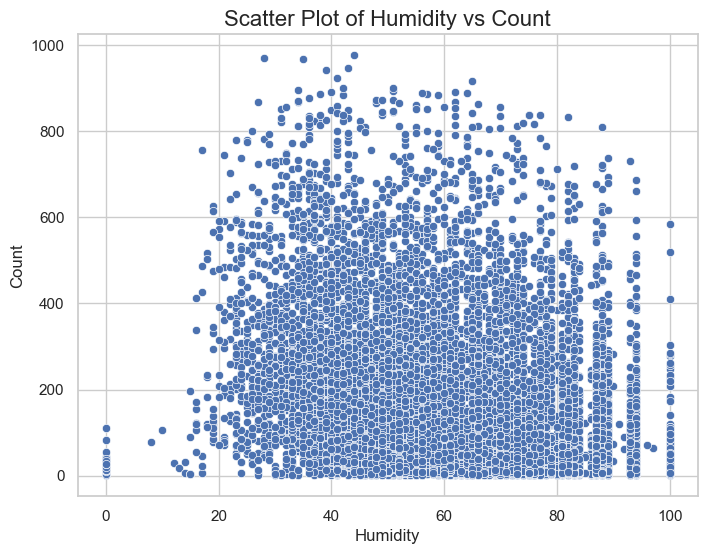

In [31]:
# Create a scatter plot of 'humidity' vs. 'count'
plt.figure(figsize=(8, 6))  # Adjust the size of the plot
sns.scatterplot(x=data['humidity'], y=data['count'])  

# Adding labels and title
plt.title('Scatter Plot of Humidity vs Count', fontsize=16)
plt.xlabel('Humidity', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()

**Hypothesis for Pearson correlation test:**

**Null Hypothesis (H₀):** There is no linear relationship between Humidity and Count.

**Alternative Hypothesis (H₁):** There is a significant linear relationship between Humidity and Count.

In [32]:
correlation, p_value = stat.pearsonr(data['humidity'],data['count'])
print(f"Pearson Correlation: {correlation}, P-value: {p_value}")

Pearson Correlation: -0.31737147887659456, P-value: 2.9215416637424966e-253


The Pearson correlation coefficient (
𝑟
=
−
0.317
r=−0.317) indicates a moderate negative linear relationship between Humidity and Count, where higher humidity is associated with lower counts. The extremely small p-value (
𝑝
≈
0
p≈0) confirms that this relationship is statistically significant. However, the correlation is not very strong, suggesting other factors might also influence the count.

**Windspeed**

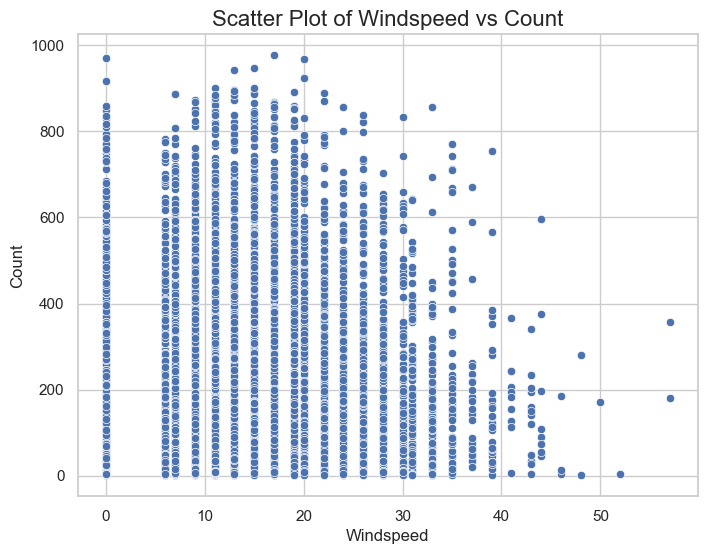

In [33]:
# Create a scatter plot of 'windspeed' vs. 'count'
plt.figure(figsize=(8, 6))  # Adjust the size of the plot
sns.scatterplot(x=data['windspeed'], y=data['count']) 

# Adding labels and title
plt.title('Scatter Plot of Windspeed vs Count', fontsize=16)
plt.xlabel('Windspeed', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()

**Hypothesis for Pearson correlation test:**

**Null Hypothesis (H₀):** There is no linear relationship between Windspeed and Count.

**Alternative Hypothesis (H₁):** There is a significant linear relationship between Windspeed and Count.

In [34]:
correlation, p_value = stat.pearsonr(data['windspeed'],data['count'])
print(f"Pearson Correlation: {correlation}, P-value: {p_value}")

Pearson Correlation: 0.10136947021033278, P-value: 2.8984072031559807e-26


The Pearson correlation coefficient (
𝑟
=
0.101
r=0.101) indicates a weak positive linear relationship between Windspeed and Count, where higher windspeed is slightly associated with higher counts. The extremely small p-value (
𝑝
≈
0
p≈0) confirms that this relationship is statistically significant. However, the weak correlation suggests windspeed has minimal influence on the count.

**Temperature**

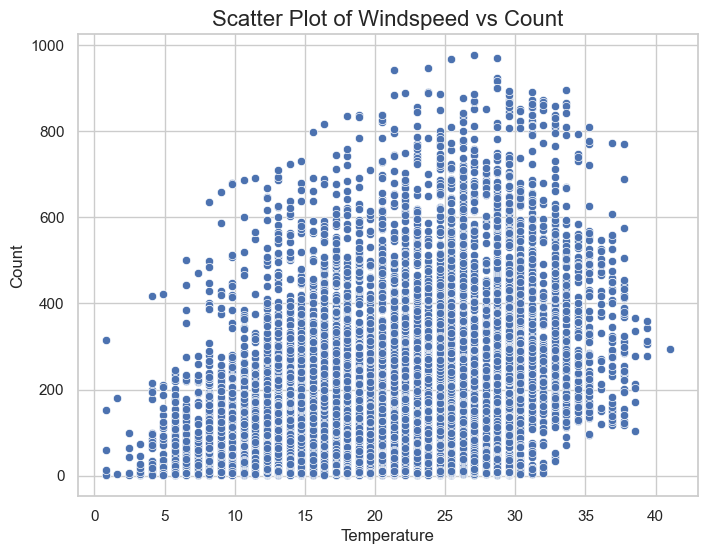

In [35]:
# Create a scatter plot of 'temp' vs. 'count'
plt.figure(figsize=(8, 6)) 
sns.scatterplot(x=data['temp'], y=data['count']) 

# Adding labels and title
plt.title('Scatter Plot of Windspeed vs Count', fontsize=16)
plt.xlabel('Temperature', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()

**Hypothesis for Pearson correlation test:**

**Null Hypothesis (H₀):** There is no linear relationship between Temperature and Count.

**Alternative Hypothesis (H₁):** There is a significant linear relationship between Temperature and Count.

In [36]:
correlation, p_value = stat.pearsonr(data['temp'],data['count'])
print(f"Pearson Correlation: {correlation}, P-value: {p_value}")

Pearson Correlation: 0.3944536449672491, P-value: 0.0


The Pearson correlation coefficient (
𝑟
=
0.394
r=0.394) indicates a moderate positive linear relationship between Temperature and Count, where higher temperatures are associated with higher counts. The p-value (
𝑝
=
0
p=0) confirms that this relationship is statistically significant. This suggests that temperature has a meaningful influence on the count, but other factors might also play a role.

**Feels-like Temperature**

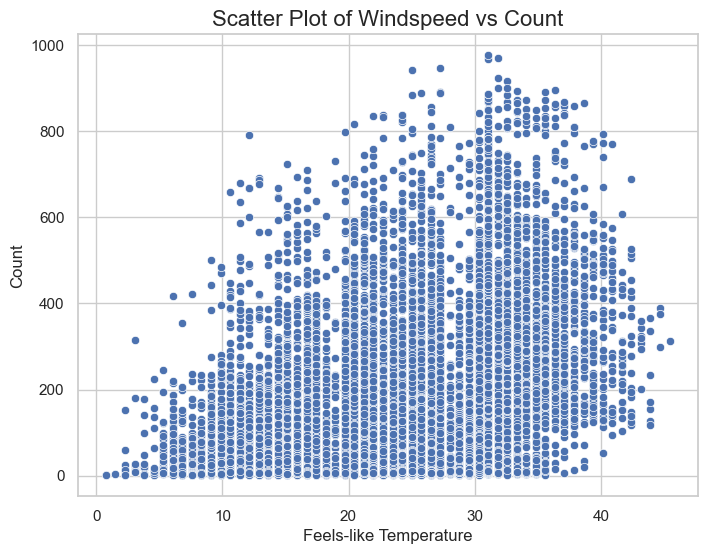

In [37]:
# Create a scatter plot of 'atemp' vs. 'count'
plt.figure(figsize=(8, 6)) 
sns.scatterplot(x=data['atemp'], y=data['count']) 

# Adding labels and title
plt.title('Scatter Plot of Windspeed vs Count', fontsize=16)
plt.xlabel('Feels-like Temperature', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()

**Hypothesis for Pearson correlation test:**

**Null Hypothesis (H₀):** There is no linear relationship between Feels-Like Temperature and Count.

**Alternative Hypothesis (H₁):** There is a significant linear relationship between Feels-Like Temperature and Count.

In [38]:
correlation, p_value = stat.pearsonr(data['atemp'],data['count'])
print(f"Pearson Correlation: {correlation}, P-value: {p_value}")

Pearson Correlation: 0.38978443662697676, P-value: 0.0


The Pearson correlation coefficient (
𝑟
=
0.390
r=0.390) indicates a moderate positive linear relationship between Feels-like Temperature and Count, where higher feels-like temperatures are associated with higher counts. The p-value (
𝑝
=
0
p=0) confirms that this relationship is statistically significant. This suggests that feels-like temperature moderately influences the count, but other factors likely contribute as well.

**Casual Users count**

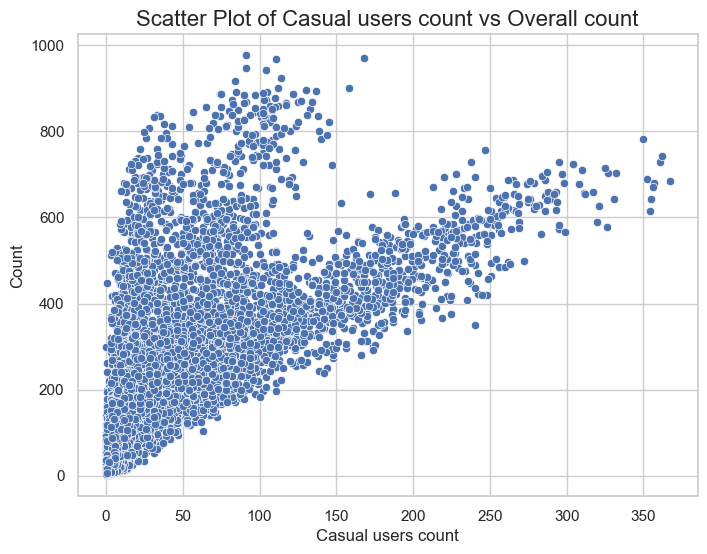

In [39]:
# Create a scatter plot of 'casual' vs. 'count'
plt.figure(figsize=(8, 6)) 
sns.scatterplot(x=data['casual'], y=data['count']) 

# Adding labels and title
plt.title('Scatter Plot of Casual users count vs Overall count', fontsize=16)
plt.xlabel('Casual users count', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()

**Hypothesis for Pearson correlation test:**

**Null Hypothesis (H₀):** There is no linear relationship between Casual users count and Count.

**Alternative Hypothesis (H₁):** There is a significant linear relationship between Casual users count and Count.

In [40]:
correlation, p_value = stat.pearsonr(data['casual'],data['count'])
print(f"Pearson Correlation: {correlation}, P-value: {p_value}")

Pearson Correlation: 0.6904135653286745, P-value: 0.0


The Pearson correlation coefficient (r = 0.390) indicates a moderate positive linear relationship between the Casual user count and the Overall count, meaning that as the Casual user count increases, the Overall count tends to increase as well. The p-value (p = 0) confirms that this relationship is statistically significant, suggesting that the association between Casual user count and Overall count is not due to random chance. This indicates that Casual users likely contribute to the Overall count, although other factors may also play a role in determining the overall user count.

**Registered Users count**

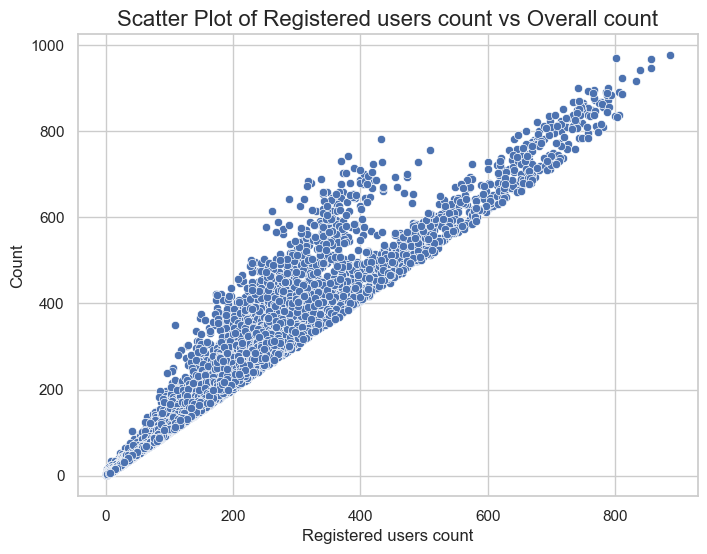

In [41]:
# Create a scatter plot of 'registered' vs. 'count'
plt.figure(figsize=(8, 6)) 
sns.scatterplot(x=data['registered'], y=data['count']) 

# Adding labels and title
plt.title('Scatter Plot of Registered users count vs Overall count', fontsize=16)
plt.xlabel('Registered users count', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()

**Hypothesis for Pearson correlation test:**

**Null Hypothesis (H₀):** There is no linear relationship between Registered users count and Count.

**Alternative Hypothesis (H₁):** There is a significant linear relationship between Registered users count and Count.

In [42]:
correlation, p_value = stat.pearsonr(data['registered'],data['count'])
print(f"Pearson Correlation: {correlation}, P-value: {p_value}")

Pearson Correlation: 0.9709481058098284, P-value: 0.0


The Pearson correlation coefficient (r = 0.9709) indicates a very strong positive linear relationship between the Registered user count and the Overall count, meaning that as the count of Registered users increases, the Overall count increases as well. The p-value (p = 0) confirms that this relationship is statistically significant, suggesting that the association between Registered user count and Overall count is highly unlikely to have occurred by chance. This implies that the count of Registered users plays a dominant role in determining the Overall count, with a very strong correlation between the two.

### Now, let's explore the relationships between the independent variables. 

#### Dependence of weather on seasons

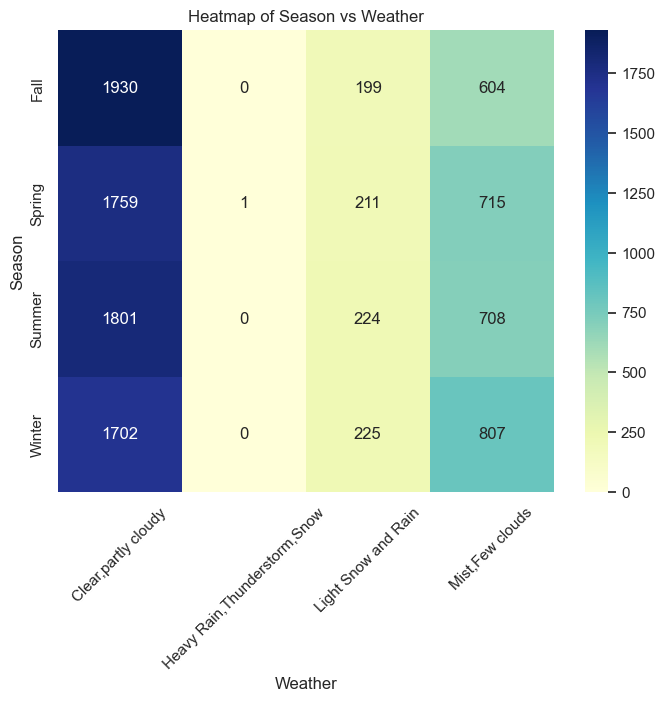

In [50]:
# Create a contingency table (cross-tabulation) between 'season' and 'weather'

season_mapping = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

# Create a new column 'weather_name' by mapping the 'season' column
data['season_name'] = data['season'].map(season_mapping)

weather_mapping = {
    1: 'Clear,partly cloudy',
    2: 'Mist,Few clouds',
    3: 'Light Snow and Rain',
    4: 'Heavy Rain,Thunderstorm,Snow'
}

# Create a new column 'season_name' by mapping the 'season' column
data['weather_name'] = data['weather'].map(weather_mapping)

contingency_table = pd.crosstab(data['season_name'], data['weather_name'])

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt="d", cbar=True)

# Add labels and title
plt.title("Heatmap of Season vs Weather")
plt.xlabel("Weather")
plt.ylabel("Season")
plt.xticks(rotation=45)

# Show the plot
plt.show()

**Hypothesis for Chi-square test:**

**Null Hypothesis (H₀):** There is no significant relationship between seasons and weathers (they are independent).

**Alternative Hypothesis (H₁):** There is a significant relationship between seasons and weathers (they are dependent).

In [54]:
# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = stat.chi2_contingency(contingency_table)

# Display the results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}\n")

# Interpret the result
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant relationship between 'season' and 'weather'.")
else:
    print("Fail to reject the null hypothesis: No significant relationship between 'season' and 'weather'.")


Chi-Square Statistic: 49.158655596893624
P-value: 1.549925073686492e-07
Degrees of Freedom: 9
Expected Frequencies: 
[[1.80559765e+03 2.51056403e-01 2.15657450e+02 7.11493845e+02]
 [1.77454639e+03 2.46738931e-01 2.11948742e+02 6.99258130e+02]
 [1.80559765e+03 2.51056403e-01 2.15657450e+02 7.11493845e+02]
 [1.80625831e+03 2.51148264e-01 2.15736359e+02 7.11754180e+02]]

Reject the null hypothesis: There is a significant relationship between 'season' and 'weather'.
